In [ ]:
#| output: false
%load_ext autoreload
%autoreload 2

Imports for handling graphs in Python

In [ ]:
import networkx as nx

Imports for cloning Git repositories and extracting the commit graph

In [ ]:
from git_commit_graph_ext.commit_graph import commit_graph, _repo_graph_name

Gathering cloned repositories and their graphs

In [ ]:
known_repos = []

This should perhaps be a list of objects of specific defined type, not list of dicts

In [ ]:
def get_known_repos():
    return known_repos

In [ ]:
get_known_repos()

[]

## From `gen-test` repository

[gen-test](https://github.com/derrickstolee/gen-test) -- Test scripts for testing new versions of generation numbers.

From the README:

> This report investigates four replacements for generation numbers, and compares the number of walked commits to the existing algorithms (both using generation numbers and not using them at all). We can use this data to make decisions for the future of the feature.

https://github.com/derrickstolee/gen-test/blob/master/clone-repos.sh

```sh
git clone git@github.com:derrickstolee/git.git --branch reach-perf

git clone git@github.com:curl/curl
git clone git@github.com:electron/electron
git clone git@github.com:FFmpeg/FFmpeg
git clone git@github.com:eclipse/jgit
git clone git@github.com:JuliaLang/julia
git clone git@github.com:jetbrains/kotlin
git clone git@github.com:torvalds/linux
git clone git@github.com:odoo/odoo
git clone git@github.com:openssl/openssl
git clone git@github.com:apple/swift
git clone git@github.com:tensorflow/tensorflow
git clone git@github.com:microsoft/TypeScript

git clone https://gerrit.googlesource.com/gerrit
git clone https://android.googlesource.com/platform/frameworks/base/ android-base
git clone https://chromium.googlesource.com/chromium/src chromium
```

:::{.callout-note}

the repositoriess from googlesource.com have trouble with cloning; it might be better to clone them from command line, not from this Jupyter notebook.

:::

### cURL repository

Curl is a command-line tool for transferring data specified with URL syntax.

In [ ]:
%%time
curl_graph = commit_graph('https://github.com/curl/curl.git', 'curl')

Wall time: 289 ms


It takes around 9 s to reclone the `curl` repository, 4 s to rescan it, and 300 ms to refresh it.

In [ ]:
known_repos = []
known_repos.append(
    {
        'name': 'curl',
        'url': 'https://github.com/curl/curl',
        'graph': curl_graph,
    }
)
known_repos[0]

{'name': 'curl',
 'url': 'https://github.com/curl/curl',
 'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>}

In [ ]:
print('commit graph of "{}" project has'.format(known_repos[0]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[0]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[0]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[0]['graph'].number_of_edges() / known_repos[0]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[0]['graph'] if known_repos[0]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[0]['graph'] if known_repos[0]['graph'].in_degree(n) == 0])))

commit graph of "curl" project has
- 26609 nodes / vertices / commits
- 26631 edges
- 1.00083 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 14 sources / roots / heads in git parlance, nodes with no incoming edge


### Electron repository

Electron -- Build cross-platform desktop apps with JavaScript, HTML, and CSS

In [ ]:
%%time
electron_graph = commit_graph('https://github.com/electron/electron.git', 'electron')

Wall time: 553 ms


It takes around 15 seconds to clone the Electron repository, and construct it's commit graph as NetworkX.DiGraph

In [ ]:
known_repos.append({
    'name': 'electron',
    'url': 'https://github.com/electron/electron.git',
    'graph': electron_graph,
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>}]

In [ ]:
print('commit graph of "{}" project has'.format(known_repos[1]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[1]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[1]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[1]['graph'].number_of_edges() / known_repos[1]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[1]['graph'] if known_repos[1]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[1]['graph'] if known_repos[1]['graph'].in_degree(n) == 0])))

commit graph of "electron" project has
- 29956 nodes / vertices / commits
- 34167 edges
- 1.14057 edge density, number of edges divided by number of nodes (vertices)
- 4 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 142 sources / roots / heads in git parlance, nodes with no incoming edge


### FFmpeg repository

<https://github.com/FFmpeg/FFmpeg> is a mirror of <https://git.ffmpeg.org/ffmpeg.git>

FFmpeg is a collection of libraries and tools to process multimedia content such as audio, video, subtitles and related metadata.

In [ ]:
%%time
ffmpeg_graph = commit_graph('https://github.com/FFmpeg/FFmpeg.git', 'ffmpeg')

Wall time: 2.14 s


It takes around 14 seconds to clone the FFmpeg repository, and construct it's commit graph as NetworkX.DiGraph,  
and around 1.4 seconds to refresh it.

In [ ]:
known_repos.append({
    'name': 'ffmpeg',
    'url': 'https://github.com/FFmpeg/FFmpeg.git',
    'graph': ffmpeg_graph
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>}]

In [ ]:
graph_idx = 2
print('commit graph [{}] of "{}" project has'.format(graph_idx, known_repos[graph_idx]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[graph_idx]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[graph_idx]['graph'].number_of_edges() / known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].in_degree(n) == 0])))

commit graph [2] of "ffmpeg" project has
- 120583 nodes / vertices / commits
- 130606 edges
- 1.08312 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 30 sources / roots / heads in git parlance, nodes with no incoming edge


### JGit repository

JGit - An implementation of the Git version control system in pure Java

In [ ]:
%%time
jgit_graph = commit_graph('https://github.com/eclipse/jgit.git', 'jgit')

Wall time: 195 ms


It takes around 34 seconds to clone the JGit repository, and construct it's commit graph as NetworkX.DiGraph,  
and 70 ms to refresh it

In [ ]:
#known_repos[3] = {
known_repos.append({
    'name': 'jgit',
    'url': 'https://github.com/eclipse/jgit.git',
    'graph': jgit_graph
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>},
 {'name': 'jgit',
  'url': 'https://github.com/eclipse/jgit.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea4f0>}]

On 01.01.2021 the JGit project had 8,162 commits, according to GitHub web UI

In [ ]:
graph_idx = 3
print('commit graph [{}] of "{}" project has'.format(graph_idx, known_repos[graph_idx]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[graph_idx]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[graph_idx]['graph'].number_of_edges() / known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].in_degree(n) == 0])))

commit graph [3] of "jgit" project has
- 8173 nodes / vertices / commits
- 9853 edges
- 1.20555 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 2 sources / roots / heads in git parlance, nodes with no incoming edge


### The Julia language repository

The Julia Programming Language  
<https://julialang.org/>

Julia is a high-level, high-performance dynamic language for technical computing.

In [ ]:
%%time
julia_graph = commit_graph('https://github.com/JuliaLang/julia.git', 'julia')

Wall time: 1.38 s


It takes around 32.7 seconds to run `commit_graph()` from scratch

The Julia language repository had 48,658 commits on 01.01.2021

In [ ]:
known_repos.append({
    'name': 'julia',
    'url': 'https://github.com/JuliaLang/julia.git',
    'homepage': 'https://julialang.org',
    'graph': julia_graph
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>},
 {'name': 'jgit',
  'url': 'https://github.com/eclipse/jgit.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea4f0>},
 {'name': 'julia',
  'url': 'https://github.com/JuliaLang/julia.git',
  'homepage': 'https://julialang.org',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f34bdc40>}]

In [ ]:
graph_idx = 4
print('commit graph [{}] of "{}" project has'.format(graph_idx, known_repos[graph_idx]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[graph_idx]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[graph_idx]['graph'].number_of_edges() / known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].in_degree(n) == 0])))

commit graph [4] of "julia" project has
- 56048 nodes / vertices / commits
- 67547 edges
- 1.20516 edge density, number of edges divided by number of nodes (vertices)
- 5 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 869 sources / roots / heads in git parlance, nodes with no incoming edge


### The Kotlin language repository

The Kotlin Programming Language  
https://kotlinlang.org/

**Kotlin** is an open-source, statically typed programming language supported and developed by JetBrains and open-source contributors.

In [ ]:
%%time
kotlin_graph = commit_graph('https://github.com/JetBrains/kotlin.git', 'kotlin')

Wall time: 2.74 s


In [ ]:
known_repos.append({
    'url': 'https://github.com/JetBrains/kotlin.git',
    'name': 'kotlin',
    'homepage': 'https://kotlinlang.org/',
    'graph': kotlin_graph,
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>},
 {'name': 'jgit',
  'url': 'https://github.com/eclipse/jgit.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea4f0>},
 {'name': 'julia',
  'url': 'https://github.com/JuliaLang/julia.git',
  'homepage': 'https://julialang.org',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f34bdc40>},
 {'url': 'https://github.com/JetBrains/kotlin.git',
  'name': 'kotlin',
  'homepage': 'https://kotlinlang.org/',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f7f1a670>}]

GitHub repo @ 01.01.2021: 71,704 commits, 3,007 branches, 20,721 tags

In [ ]:
graph_idx = 5
print('commit graph [{}] of "{}" project has'.format(graph_idx, known_repos[graph_idx]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[graph_idx]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[graph_idx]['graph'].number_of_edges() / known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].in_degree(n) == 0])))

commit graph [5] of "kotlin" project has
- 117495 nodes / vertices / commits
- 119013 edges
- 1.01292 edge density, number of edges divided by number of nodes (vertices)
- 9 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 2592 sources / roots / heads in git parlance, nodes with no incoming edge


### Linux repository

Linux kernel source tree (on GitHub)

In [ ]:
%%time
linux_graph = commit_graph('https://github.com/torvalds/linux.git', 'linux')

Wall time: 16.9 s


Wall time: 1min 44s (full clone and extracting the commit graph)

In [ ]:
known_repos.append({
    'url': 'https://github.com/torvalds/linux.git',
    'name': 'linux',
    'graph': linux_graph,
})
known_repos

[{'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>},
 {'name': 'jgit',
  'url': 'https://github.com/eclipse/jgit.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea4f0>},
 {'name': 'julia',
  'url': 'https://github.com/JuliaLang/julia.git',
  'homepage': 'https://julialang.org',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f34bdc40>},
 {'url': 'https://github.com/JetBrains/kotlin.git',
  'name': 'kotlin',
  'homepage': 'https://kotlinlang.org/',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f7f1a670>},
 {'url': 'https://github.com/torvalds/linux.git',
  'name': 'linux',
  'graph': <networkx.classes.digraph.DiGraph at 0x

982,030 commits,  1 branch,  679 tags

In [ ]:
graph_idx = 6
print('commit graph [{}] of "{}" project has'.format(graph_idx, known_repos[graph_idx]['name']))
print('- {} nodes / vertices / commits'.format(known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repos[graph_idx]['graph'].number_of_edges()))
print('- {:.5f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repos[graph_idx]['graph'].number_of_edges() / known_repos[graph_idx]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repos[graph_idx]['graph'] if known_repos[graph_idx]['graph'].in_degree(n) == 0])))

commit graph [6] of "linux" project has
- 982030 nodes / vertices / commits
- 1061095 edges
- 1.08051 edge density, number of edges divided by number of nodes (vertices)
- 4 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 1 sources / roots / heads in git parlance, nodes with no incoming edge


### Odoo repository

Odoo. Open Source Apps To Grow Your Business.  
<https://www.odoo.com/>

**Odoo** is a suite of web based open source business apps.

In [ ]:
%%time
odoo_graph = commit_graph('https://github.com/odoo/odoo.git', 'odoo')

Wall time: 2.51 s


Wall time 1min 4s (first time `commit_graph()`)

In [ ]:
known_repo = {repo['name']: repo for repo in known_repos}
known_repo

{'curl': {'name': 'curl',
  'url': 'https://github.com/curl/curl',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ca0>},
 'electron': {'name': 'electron',
  'url': 'https://github.com/electron/electron.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3970>},
 'ffmpeg': {'name': 'ffmpeg',
  'url': 'https://github.com/FFmpeg/FFmpeg.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e59d3ee0>},
 'jgit': {'name': 'jgit',
  'url': 'https://github.com/eclipse/jgit.git',
  'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea4f0>},
 'julia': {'name': 'julia',
  'url': 'https://github.com/JuliaLang/julia.git',
  'homepage': 'https://julialang.org',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f34bdc40>},
 'kotlin': {'url': 'https://github.com/JetBrains/kotlin.git',
  'name': 'kotlin',
  'homepage': 'https://kotlinlang.org/',
  'graph': <networkx.classes.digraph.DiGraph at 0x195f7f1a670>},
 'linux': {'url': 'https://github.com/torvalds/linux.git',
  '

In [ ]:
known_repo['odoo'] = {
    'name': 'odoo',
    'url': 'https://github.com/odoo/odoo.git',
    'homepage': 'https://www.odoo.com/',
    'graph': odoo_graph,
}
known_repo['odoo']

{'name': 'odoo',
 'url': 'https://github.com/odoo/odoo.git',
 'homepage': 'https://www.odoo.com/',
 'graph': <networkx.classes.digraph.DiGraph at 0x195f34bd4c0>}

In [ ]:
repo_name = 'odoo'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repo[repo_name]['graph'].number_of_edges()))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['graph'].number_of_edges() / known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "odoo" project has:
- 158324 nodes / vertices / commits
- 184403 edges
- 1.164719 edge density, number of edges divided by number of nodes (vertices)
- 7 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 33 sources / roots / heads in git parlance, nodes with no incoming edge


On GitHub @ 01.01.2021: 139,989 commits,  82 branches,  0 tags

### OpenSSL repository

**OpenSSL** is a robust, commercial-grade, full-featured Open Source Toolkit for the Transport Layer Security (TLS) protocol formerly known as the Secure Sockets Layer (SSL) protocol. The protocol implementation is based on a full-strength general purpose cryptographic library, which can also be used stand-alone.

OpenSSL is descended from the SSLeay library developed by Eric A. Young and Tim J. Hudson.

The official Home Page of the OpenSSL Project is <www.openssl.org>.

In [ ]:
%%time
openssl_graph = commit_graph('https://github.com/openssl/openssl.git', 'openssl')

Wall time: 763 ms


Wall time 18 seconds (first time)

In [ ]:
known_repo['openssl'] = {
    'name': 'openssl',
    'url': 'https://github.com/openssl/openssl.git',
    'homepage': 'https://www.openssl.org',
    'graph': openssl_graph,
}
known_repo['openssl']

{'name': 'openssl',
 'url': 'https://github.com/openssl/openssl.git',
 'homepage': 'https://www.openssl.org',
 'graph': <networkx.classes.digraph.DiGraph at 0x195e2d57430>}

In [ ]:
repo_name = 'openssl'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repo[repo_name]['graph'].number_of_edges()))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['graph'].number_of_edges() / known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "openssl" project has:
- 42818 nodes / vertices / commits
- 42997 edges
- 1.004180 edge density, number of edges divided by number of nodes (vertices)
- 6 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 19 sources / roots / heads in git parlance, nodes with no incoming edge


OpenSSL repo @ 01.01.2021: 27,812 commits, 20 branches, 320 tags

### The Swift language repository

The Swift Programming Language  
<https://swift.org>

**Swift** is a high-performance system programming language. It has a clean and modern syntax, offers seamless access to existing C and Objective-C code and frameworks, and is memory safe by default.

Although inspired by Objective-C and many other languages, Swift is not itself a C-derived language. As a complete and independent language, Swift packages core features like flow control, data structures, and functions, with high-level constructs like objects, protocols, closures, and generics. Swift embraces modules, eliminating the need for headers and the code duplication they entail.

To learn more about the programming language, visit [swift.org](https://swift.org/documentation/).

In [ ]:
%%time
swift_graph = commit_graph('https://github.com/apple/swift.git', 'swift')

Wall time: 4.25 s


Wall time: 41 s (first time)

In [ ]:
known_repo['swift'] = {
    'name': 'swift',
    'url': 'https://github.com/apple/swift.git',
    'homepage': 'https://swift.org',
    'graph': swift_graph,
    'n_nodes': swift_graph.number_of_nodes(),
    'n_edges': swift_graph.number_of_edges(),
}
known_repo['swift']

{'name': 'swift',
 'url': 'https://github.com/apple/swift.git',
 'homepage': 'https://swift.org',
 'graph': <networkx.classes.digraph.DiGraph at 0x195f7f1a130>,
 'n_nodes': 132444,
 'n_edges': 176028}

In [ ]:
repo_name = 'swift'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} edges'.format(known_repo[repo_name]['graph'].number_of_edges()))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['graph'].number_of_edges() / known_repo[repo_name]['graph'].number_of_nodes()))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "swift" project has:
- 132444 nodes / vertices / commits
- 176028 edges
- 1.329075 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 209 sources / roots / heads in git parlance, nodes with no incoming edge


Swift repository on GitHub @ 01.01.2021: 114,559 commits

### TensorFlow repository

An Open Source Machine Learning Framework for Everyone  
https://tensorflow.org

**TensorFlow** is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.

In [ ]:
%%time
tensorflow_graph = commit_graph('https://github.com/tensorflow/tensorflow.git', 'tensorflow')

Wall time: 2.12 s


Wall time: 34.3 s (first time)

In [ ]:
known_repo['tensorflow'] = {
    'name': 'tensorflow',
    'url': 'https://github.com/tensorflow/tensorflow.git',
    'homepage': 'https://tensorflow.org',
    'graph': tensorflow_graph,
    'n_nodes': tensorflow_graph.number_of_nodes(),
    'n_edges': tensorflow_graph.number_of_edges(),
}
known_repo['tensorflow']

{'name': 'tensorflow',
 'url': 'https://github.com/tensorflow/tensorflow.git',
 'homepage': 'https://tensorflow.org',
 'graph': <networkx.classes.digraph.DiGraph at 0x195e79ea340>,
 'n_nodes': 105236,
 'n_edges': 115687}

In [ ]:
repo_name = 'tensorflow'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "tensorflow" project has:
- 105236 nodes / vertices / commits
- 115687 edges
- 1.099310 edge density, number of edges divided by number of nodes (vertices)
- 3 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 32 sources / roots / heads in git parlance, nodes with no incoming edge


TensorFlow repository on GitHub @ 01.01.2021: 102,131 commits,  36 branches

### The TypeScript language repository

TypeScript is a superset of JavaScript that compiles to clean JavaScript output.  
www.typescriptlang.org

**TypeScript** is a language for application-scale JavaScript. TypeScript adds optional types to JavaScript that support tools for large-scale JavaScript applications for any browser, for any host, on any OS. TypeScript compiles to readable, standards-based JavaScript.

In [ ]:
%%time
typescript_graph = commit_graph('https://github.com/microsoft/TypeScript.git', 'typescript')

Wall time: 1.04 s


Wall time: 23.4 s (first time)

In [ ]:
known_repo['typescript'] = {
    'name': 'typescript',
    'url': 'https://github.com/microsoft/TypeScript.git',
    'homepage': 'https://www.typescriptlang.org/',
    'graph': typescript_graph,
    'n_nodes': typescript_graph.number_of_nodes(),
    'n_edges': typescript_graph.number_of_edges(),
}
known_repo['typescript']

{'name': 'typescript',
 'url': 'https://github.com/microsoft/TypeScript.git',
 'homepage': 'https://www.typescriptlang.org/',
 'graph': <networkx.classes.digraph.DiGraph at 0x195f7f1ad90>,
 'n_nodes': 35486,
 'n_edges': 43895}

In [ ]:
repo_name = 'typescript'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "typescript" project has:
- 35486 nodes / vertices / commits
- 43895 edges
- 1.236967 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 419 sources / roots / heads in git parlance, nodes with no incoming edge


TypeScript repository on GitHub @ 01.01.2021: 31,596 commits, 455 branches

### Git project repository

<https://github.com/git/git> is Git Source Code Mirror - This is a publish-only repository and all pull requests are ignored.  
https://git-scm.com/

**Git** is a fast, scalable, distributed revision control system with an unusually rich command set that provides both high-level operations and full access to internals.

In [ ]:
%%time
git_graph = commit_graph('https://github.com/git/git.git', 'git.git')

Wall time: 754 ms


In [ ]:
known_repo['git.git'] = {
    'name': 'git.git',
    'graph_name': _repo_graph_name('repos/git.git'),
    'url': 'https://github.com/git/git.git',
    'homepage': 'https://git-scm.com/',
    'graph': git_graph,
    'n_nodes': git_graph.number_of_nodes(),
    'n_edges': git_graph.number_of_edges(),
}
known_repo['git.git']

{'name': 'git.git',
 'graph_name': 'git-commit_graph',
 'url': 'https://github.com/git/git.git',
 'homepage': 'https://git-scm.com/',
 'graph': <networkx.classes.digraph.DiGraph at 0x195f34bd640>,
 'n_nodes': 63829,
 'n_edges': 79664}

In [ ]:
repo_name = 'git.git'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "git.git" project has:
- 63829 nodes / vertices / commits
- 79664 edges
- 1.248085 edge density, number of edges divided by number of nodes (vertices)
- 9 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 3 sources / roots / heads in git parlance, nodes with no incoming edge


Git.git repository on GitHub @ 01.01.2021: 61,475 commits,  5 branches

### Gerrit repository

**Gerrit Code Review** is a free, web-based team code collaboration tool. Software developers in a team can review each other's modifications on their source code using a Web browser and approve or reject those changes. It integrates closely with Git, a distributed version control system.

https://www.gerritcodereview.com/

In [ ]:
%%time
gerrit_graph = commit_graph('https://gerrit.googlesource.com/gerrit', 'gerrit')

Wall time: 402 ms


Wall time: 1min 2s (first time), 0.4s (subsequent times)

In [ ]:
%%time
known_repo['gerrit'] = {
    'name': 'gerrit',
    'graph_name': _repo_graph_name('repos/gerrit'),
    'url': 'https://gerrit.googlesource.com/gerrit',
    'homepage': 'https://www.gerritcodereview.com/',
    'graph': gerrit_graph,
    'n_nodes': gerrit_graph.number_of_nodes(),
    'n_edges': gerrit_graph.number_of_edges(),
}
known_repo['gerrit']

Wall time: 51 ms


{'name': 'gerrit',
 'graph_name': 'gerrit-commit_graph',
 'url': 'https://gerrit.googlesource.com/gerrit',
 'homepage': 'https://www.gerritcodereview.com/',
 'graph': <networkx.classes.digraph.DiGraph at 0x196101db850>,
 'n_nodes': 47687,
 'n_edges': 63944}

In [ ]:
repo_name = 'gerrit'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "gerrit" project has:
- 47687 nodes / vertices / commits
- 63944 edges
- 1.340911 edge density, number of edges divided by number of nodes (vertices)
- 4 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 6 sources / roots / heads in git parlance, nodes with no incoming edge


### Android-base repository

In [ ]:
%%time
android_graph = commit_graph('https://android.googlesource.com/platform/frameworks/base/', 'android-base')

Wall time: 9.33 s


Wall time: 2min 9s (first time), 20.7 s (rescan), 9.33 s (subsequent runs)

In [ ]:
#%%time
#!git clone --filter=tree:0 --no-checkout https://android.googlesource.com/platform/frameworks/base/ repos/android-base

In [ ]:
known_repo['android-base'] = {
    'name': 'android-base',
    'url': 'https://android.googlesource.com/platform/frameworks/base/',
    'graph': android_graph,
    'n_nodes': android_graph.number_of_nodes(),
    'n_edges': android_graph.number_of_edges(),
}
known_repo['android-base']

{'name': 'android-base',
 'url': 'https://android.googlesource.com/platform/frameworks/base/',
 'graph': <networkx.classes.digraph.DiGraph at 0x1961516dc10>,
 'n_nodes': 559423,
 'n_edges': 984070}

In [ ]:
repo_name = 'android-base'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "android-base" project has:
- 559423 nodes / vertices / commits
- 984070 edges
- 1.759080 edge density, number of edges divided by number of nodes (vertices)
- 3 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 1 sources / roots / heads in git parlance, nodes with no incoming edge


### Chromium repository

**Chromium** is an open-source browser project that aims to build a safer, faster, and more stable way for all users to experience the web.

The project's web site is https://www.chromium.org.

In [ ]:
%%time
chromium_graph = commit_graph('https://chromium.googlesource.com/chromium/src', 'chromium')

Wall time: 14.1 s


Wall time: 39min 52s (first time, possibly failed), rescan: 39.3 s, subsequent runs: 14.1 s

In [ ]:
known_repo['chromium'] = {
    'name': 'chromium',
    'url': 'https://chromium.googlesource.com/chromium/src',
    'homepage': 'https://www.chromium.org',
    'graph': chromium_graph,
    'n_nodes': chromium_graph.number_of_nodes(),
    'n_edges': chromium_graph.number_of_edges(),
}
known_repo['chromium']

{'name': 'chromium',
 'url': 'https://chromium.googlesource.com/chromium/src',
 'homepage': 'https://www.chromium.org',
 'graph': <networkx.classes.digraph.DiGraph at 0x196101db7c0>,
 'n_nodes': 961204,
 'n_edges': 961263}

In [ ]:
repo_name = 'chromium'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "chromium" project has:
- 961204 nodes / vertices / commits
- 961263 edges
- 1.000061 edge density, number of edges divided by number of nodes (vertices)
- 3 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 1 sources / roots / heads in git parlance, nodes with no incoming edge


## Slides (unused repositories)

These are the repositories (not present among the repositories above) that were considered for inclusion in "[_Graph operations in Git version control system_][google-drive-slides]", and are presented as comments in the `*.tex` sources.

[google-drive-slides]: https://drive.google.com/open?id=1psMBVfcRHcZeJ7AewGpdoymrEfFVdXoK "Graph operations in Git version control system (PDF)"

### LLVM repository

The LLVM Compiler Infrastructure  
https://llvm.org/

The LLVM Project is a collection of modular and reusable compiler and toolchain technologies. Despite its name, LLVM has little to do with traditional virtual machines. The name "LLVM" itself is not an acronym; it is the full name of the project.

In [ ]:
%%time
llvm_graph = commit_graph('https://github.com/llvm/llvm-project.git', 'llvm')

Wall time: 3.53 s


Wall time: 33.5 s (first time), 3.53 s (subsequent run)

In [ ]:
known_repo['llvm'] = {
    'name': 'llvm',
    'url': 'https://github.com/llvm/llvm-project.git',
    'homepage': 'https://llvm.org/',
    'graph': llvm_graph,
    'n_nodes': llvm_graph.number_of_nodes(),
    'n_edges': llvm_graph.number_of_edges(),
}
known_repo['llvm']

{'name': 'llvm',
 'url': 'https://github.com/llvm/llvm-project.git',
 'homepage': 'https://llvm.org/',
 'graph': <networkx.classes.digraph.DiGraph at 0x1969020a430>,
 'n_nodes': 381471,
 'n_edges': 381486}

In [ ]:
repo_name = 'llvm'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "llvm" project has:
- 381471 nodes / vertices / commits
- 381486 edges
- 1.000039 edge density, number of edges divided by number of nodes (vertices)
- 3 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 40 sources / roots / heads in git parlance, nodes with no incoming edge


The LLVM repository  on GitHub @ 01.01.2021: 375,962 commits,  42 branches

### GCC repository

GCC, the GNU Compiler Collection  
https://gcc.gnu.org/

The GNU Compiler Collection includes front ends for C, C++, Objective-C, Fortran, Ada, Go, and D, as well as libraries for these languages (libstdc++,...). GCC was originally written as the compiler for the GNU operating system.

In [ ]:
%%time
gcc_graph = commit_graph('https://gcc.gnu.org/git/gcc.git', 'gcc')

Wall time: 2.15 s


Wall time: 13min 48s (first time), 2.15s (subsequent runs)

In [ ]:
known_repo['gcc'] = {
    'name': 'gcc',
    'url': 'https://gcc.gnu.org/git/gcc.git',
    'homepage': 'https://gcc.gnu.org/',
    'graph': gcc_graph,
    'n_nodes': gcc_graph.number_of_nodes(),
    'n_edges': gcc_graph.number_of_edges(),
}
known_repo['gcc']

{'name': 'gcc',
 'url': 'https://gcc.gnu.org/git/gcc.git',
 'homepage': 'https://gcc.gnu.org/',
 'graph': <networkx.classes.digraph.DiGraph at 0x1969020a250>,
 'n_nodes': 241243,
 'n_edges': 242024}

In [ ]:
repo_name = 'gcc'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "gcc" project has:
- 241243 nodes / vertices / commits
- 242024 edges
- 1.003237 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 45 sources / roots / heads in git parlance, nodes with no incoming edge


### Homebrew repository

Homebrew -- The Missing Package Manager for macOS (or Linux)  
https://brew.sh/

**Homebrew** is a free and open-source software package management system that simplifies the installation of software on Apple's macOS operating system and Linux. The name is intended to suggest the idea of building software on the Mac depending on the user's taste.

In [ ]:
%%time
brew_graph = commit_graph('https://github.com/Homebrew/brew.git', 'homebrew')

Wall time: 452 ms


Wall time: 28 s (first time), 452 ms (subsequent times)

In [ ]:
known_repo['homebrew'] = {
    'name': 'homebrew',
    'url': 'https://github.com/Homebrew/brew.git',
    'homepage': 'https://brew.sh/',
    'graph': brew_graph,
    'n_nodes': brew_graph.number_of_nodes(),
    'n_edges': brew_graph.number_of_edges(),
}
known_repo['homebrew']

{'name': 'homebrew',
 'url': 'https://github.com/Homebrew/brew.git',
 'homepage': 'https://brew.sh/',
 'graph': <networkx.classes.digraph.DiGraph at 0x1961516dbb0>,
 'n_nodes': 25286,
 'n_edges': 30956}

In [ ]:
repo_name = 'homebrew'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "homebrew" project has:
- 25286 nodes / vertices / commits
- 30956 edges
- 1.224235 edge density, number of edges divided by number of nodes (vertices)
- 2 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 4 sources / roots / heads in git parlance, nodes with no incoming edge


Homebrew (brew) repository on GitHub @ 05.01.2021: 25,281 commits, 4 branches

### Ruby on Rails repository

Ruby on Rails | A web-application framework that includes everything needed to create database-backed web applications according to the Model-View-Controller (MVC) pattern.  
https://rubyonrails.org/

In [ ]:
%%time
rails_graph = commit_graph('https://github.com/rails/rails.git', 'rails')

Wall time: 776 ms


Wall time: 57.1 s (first time), 776 ms (subsequent times)

In [ ]:
known_repo['rails'] = {
    'name': 'rails',
    'url': 'https://github.com/rails/rails.git',
    'homepage': 'https://rubyonrails.org/',
    'graph': rails_graph,
    'n_nodes': rails_graph.number_of_nodes(),
    'n_edges': rails_graph.number_of_edges(),
}
known_repo['rails']

{'name': 'rails',
 'url': 'https://github.com/rails/rails.git',
 'homepage': 'https://rubyonrails.org/',
 'graph': <networkx.classes.digraph.DiGraph at 0x195f34bd460>,
 'n_nodes': 92577,
 'n_edges': 111930}

In [ ]:
repo_name = 'rails'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "rails" project has:
- 92577 nodes / vertices / commits
- 111930 edges
- 1.209048 edge density, number of edges divided by number of nodes (vertices)
- 7 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 48 sources / roots / heads in git parlance, nodes with no incoming edge


Ruby on Rails repository on GitHub @ 05.01.2021: 78,831 commits, 52 branches

## GitHub Blog post on cloning behavior

"_Git clone: a data-driven study on cloning behaviors_"  
Solmaz Abbaspoursani, December 22, 2020  
https://github.blog/2020-12-22-git-clone-a-data-driven-study-on-cloning-behaviors/

### jQuery repository

**jQuery** is a fast, small, and feature-rich JavaScript library. It makes things like HTML document traversal and manipulation, event handling, animation, and Ajax much simpler with an easy-to-use API that works across a multitude of browsers.

In [ ]:
%%time
jquery_graph = commit_graph('https://github.com/jquery/jquery.git', 'jquery')

Wall time: 69 ms


Wall time: 12.7 s (first time), 0.07 s (subsequent times)

In [ ]:
known_repo['jquery'] = {
    'name': 'jquery',
    'url': 'https://github.com/jquery/jquery.git',
    'homepage': 'https://jquery.com/',
    'graph': jquery_graph,
    'n_nodes': jquery_graph.number_of_nodes(),
    'n_edges': jquery_graph.number_of_edges(),
}
known_repo['jquery']

{'name': 'jquery',
 'url': 'https://github.com/jquery/jquery.git',
 'homepage': 'https://jquery.com/',
 'graph': <networkx.classes.digraph.DiGraph at 0x196ca968820>,
 'n_nodes': 7741,
 'n_edges': 7990}

In [ ]:
repo_name = 'jquery'
print('commit graph of "{}" project has:'.format(repo_name))
print('- {} nodes / vertices / commits'.format(known_repo[repo_name]['n_nodes']))
print('- {} edges'.format(known_repo[repo_name]['n_edges']))
print('- {:.6f} edge density, number of edges divided by number of nodes (vertices)'.
      format(known_repo[repo_name]['n_edges'] / known_repo[repo_name]['n_nodes']))
print('- {} sinks / leafs / roots in git parlance, nodes with no outgoing edges'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].out_degree(n) == 0])))
print('- {} sources / roots / heads in git parlance, nodes with no incoming edge'.
     format(len([n for n in known_repo[repo_name]['graph'] if known_repo[repo_name]['graph'].in_degree(n) == 0])))

commit graph of "jquery" project has:
- 7741 nodes / vertices / commits
- 7990 edges
- 1.032166 edge density, number of edges divided by number of nodes (vertices)
- 1 sinks / leafs / roots in git parlance, nodes with no outgoing edges
- 4 sources / roots / heads in git parlance, nodes with no incoming edge


jQuery repository on GitHub on 05.01.2021: 6,519 commits, 4 branches

## Other possibilities

Browsing through OpenHub and GitHub (neither of which provides a search mechanism or a sort order for the number of commits), the following repositories may be considered for inclusion:

- [ ] OpenBSD, with around 650,000 commits
- [ ] FreeBSD, with around 250,000 commits
- [ ] LibreOffice, with around 500,000 commits
- [ ] Mozilla Firefox, with around 740,000 commits
- [ ] GNU Emacs, with around 150,000 commits

Another good source for large repositories might be the Git Merge 2017 talk "[Top Ten Worst Repositories to host on GitHub - Git Merge 2017](https://www.youtube.com/watch?v=-ZNKR9wFe8o)" (on YouTube)

- Kubernetes (large amoun of pull requests, around 100,000 commits)
- CocoaPods/Specs (with around 550,000 commits, automatic)
- octocats/Spoon-Knife (3 commits, 5k+ pull requests, 115k forks)
- IntelliJ IDEA Community Edition (around 300,000 commits, around 700 tags - was 45k tags)
- EnkiDevs/commit (around 150,000 commits, 26k individual authors, leaderboard, archived)


## Summary

Imports for data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
for name, repo in known_repo.items():
    print('... processing {}'.format(name))
    if 'n_nodes' not in repo:
        repo['n_nodes'] = repo['graph'].number_of_nodes()
    if 'n_edges' not in repo:
        repo['n_edges'] = repo['graph'].number_of_edges()

... processing curl
... processing electron
... processing ffmpeg
... processing jgit
... processing julia
... processing kotlin
... processing linux
... processing odoo
... processing openssl
... processing swift
... processing tensorflow
... processing typescript
... processing git.git
... processing gerrit
... processing android-base
... processing chromium
... processing llvm
... processing gcc
... processing homebrew
... processing rails


In [ ]:
known_repo_df = pd.DataFrame.from_dict(known_repo, orient='index',
                                       columns=['url', 'n_nodes', 'n_edges']).astype({'url': 'str'})
known_repo_df['n_edges / n_nodes'] = known_repo_df['n_edges'] / known_repo_df['n_nodes']
known_repo_df.sort_values('n_nodes')

,url,n_nodes,n_edges,n_edges / n_nodes
jquery,https://github.com/jquery/jquery.git,7741,7990,1.032166
jgit,https://github.com/eclipse/jgit.git,8173,9853,1.205555
homebrew,https://github.com/Homebrew/brew.git,25286,30956,1.224235
curl,https://github.com/curl/curl,26609,26631,1.000827
electron,https://github.com/electron/electron.git,29956,34167,1.140573
typescript,https://github.com/microsoft/TypeScript.git,35486,43895,1.236967
openssl,https://github.com/openssl/openssl.git,42818,42997,1.004180
gerrit,https://gerrit.googlesource.com/gerrit,47687,63944,1.340911
julia,https://github.com/JuliaLang/julia.git,56048,67547,1.205163
git.git,https://github.com/git/git.git,63829,79664,1.248085


In [ ]:
known_repo_df.dtypes

url                   object
n_nodes                int64
n_edges                int64
n_edges / n_nodes    float64
dtype: object

Makit it so that the labels do not overlap.

https://support.sisense.com/hc/en-us/community/posts/360037908374-Getting-Around-Overlapping-Data-Labels-With-Python  
https://github.com/Phlya/adjustText/

In [ ]:
# source: https://stackoverflow.com/questions/8850142/matplotlib-overlapping-annotations
def get_text_positions(x_data, y_data, txt_width, txt_height):
    a = zip(y_data, x_data)
    text_positions = y_data.copy()
    for index, (y, x) in enumerate(a):
        local_text_positions = [i for i in a if i[0] > (y - txt_height)
                                and (abs(i[1] - x) < txt_width * 2) and i != (y,x)]
        if local_text_positions:
            sorted_ltp = sorted(local_text_positions)
            if abs(sorted_ltp[0][0] - y) < txt_height: #True == collision
                differ = np.diff(sorted_ltp, axis=0)
                a[index] = (sorted_ltp[-1][0] + txt_height, a[index][1])
                text_positions[index] = sorted_ltp[-1][0] + txt_height
                for k, (j, m) in enumerate(differ):
                    #j is the vertical distance between words
                    if j > txt_height * 1.5: #if True then room to fit a word in
                        a[index] = (sorted_ltp[k][0] + txt_height, a[index][1])
                        text_positions[index] = sorted_ltp[k][0] + txt_height
                        break
    return text_positions


def text_plotter(x_data, y_data, text_positions, axis,txt_width,txt_height):
    for x,y,t in zip(x_data, y_data, text_positions):
        axis.text(x - .03, 1.02*t, '%d'%int(y),rotation=0, color='blue', fontsize=13)
        if y != t:
            axis.arrow(x, t+20,0,y-t, color='blue',alpha=0.2, width=txt_width*0.0,
                       head_width=.02, head_length=txt_height*0.5,
                       zorder=0,length_includes_head=True)

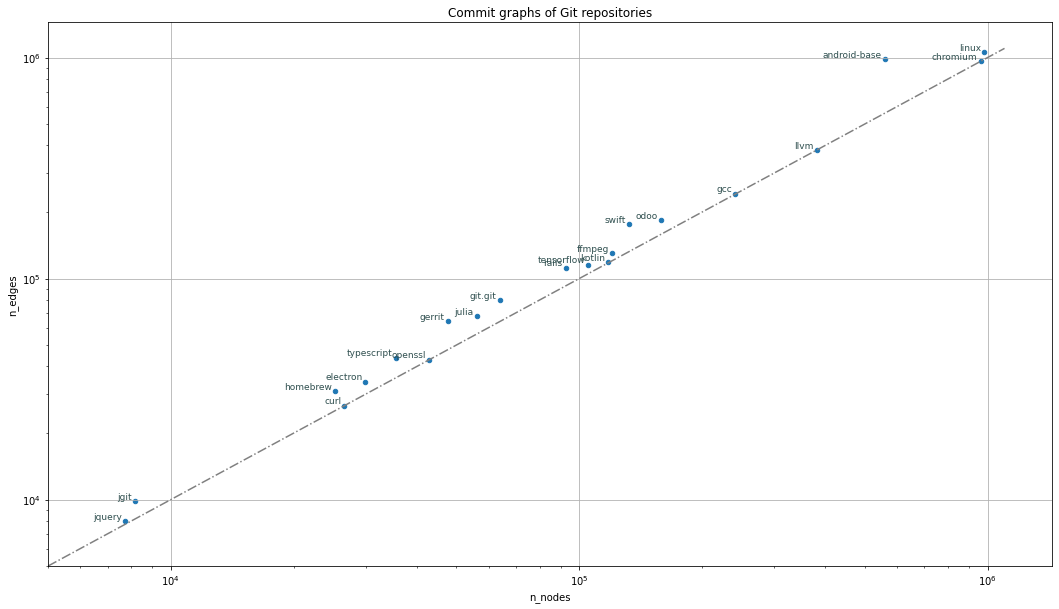

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(18, 10))
ax = known_repo_df.plot.scatter(x='n_nodes', y='n_edges',
                                logx=True, logy=True,
                                grid=True, ax=ax,
                                title='Commit graphs of Git repositories')
# line
ee = np.geomspace(5000,1100000,num=10)
ax.plot(ee, ee, '-.', label='nodes == edges', c='gray')
# parameters
ax.set_xlim(left  =5e3)
ax.set_ylim(bottom=5e3)
#plt.legend(loc='upper left')
# labels
for row in known_repo_df.itertuples():
    ax.annotate(row[0], xy=(row.n_nodes, row.n_edges),
                xytext=(-3,2), textcoords='offset points', horizontalalignment='right',
                family='sans-serif', fontsize=9, color='darkslategrey')
# show
plt.show()